In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import tensorflow.keras as keras
from generator import * 

2025-02-05 11:46:19.643600: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-05 11:46:19.663171: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-05 11:46:19.663186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-05 11:46:19.663706: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-05 11:46:19.667095: I tensorflow/core/platform/cpu_feature_guar

In [2]:
def sum_metric(y_true, y_pred):
    # Ensure y_true is a tensor and has the same shape as y_pred
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.reshape(y_pred, tf.shape(y_true))  # Reshape to match dimensions
    
    # Round y_pred to nearest integer
    y_pred_rounded = tf.round(y_pred)

    # Compare elements
    correct_predictions = tf.reduce_sum(tf.cast(tf.equal(y_true, y_pred_rounded), dtype=tf.float32))

    # Compute final metric (accuracy-like)
    return correct_predictions / tf.cast(tf.size(y_true), tf.float32)

In [3]:
generator = ClutteredMNISTGenerator(n_samples=10000, img_size=128, batch_size=64)

validation_generator = ClutteredMNISTGenerator(n_samples=1000, img_size=128, batch_size=64)

In [4]:
a,b = generator.__getitem__(1)

29


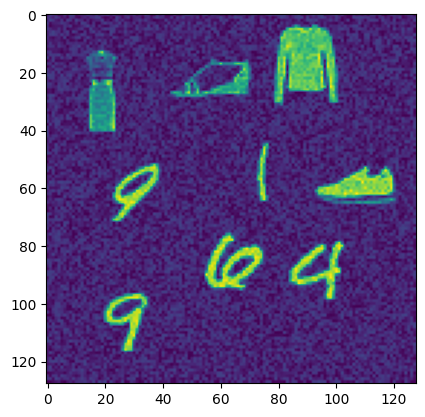

In [5]:
plt.imshow(a[0])
print(b[0])

In [6]:
# CNN Baseline Model
def build_baseline_model():
    inputs = keras.Input(shape=(128, 128, 1))
    x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(1, activation='relu')(x)
    return keras.Model(inputs, outputs)

In [7]:
baseline_model = build_baseline_model()

2025-02-05 11:46:21.549058: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-05 11:46:21.562450: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-05 11:46:21.562576: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [ ]:
baseline_model.compile(optimizer='adam', loss='mse', metrics=[sum_metric])

In [39]:
baseline_model.fit(generator, epochs=30)
baseline_model.evaluate(validation_generator)

Epoch 1/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 2.3458 - sum_metric: 0.2871
Epoch 2/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 2.4469 - sum_metric: 0.2788
Epoch 3/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 2.4144 - sum_metric: 0.2769
Epoch 4/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 2.2212 - sum_metric: 0.2952
Epoch 5/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 2.2938 - sum_metric: 0.2831
Epoch 6/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 2.3353 - sum_metric: 0.2835
Epoch 7/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 2.3295 - sum_metric: 0.2808
Epoch 8/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 2.3180 - sum_metric: 0.2855
Epoch 9/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 2.2208 - sum_metric: 0.2905
Epoch 10/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 2.1942 - sum_metric: 0.3031
Epoch 11/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 2.1731 - sum_metric: 0.3018
Epoch 12/30
156/156

[1.7734529972076416, 0.30937498807907104]

In [68]:
baseline_model.save_weights("baseline_test3.weights.h5")

In [40]:
images, sums = generator.__getitem__(1)
pred_sums = baseline_model(images)

In [41]:
def plot_images(images,sums,pred_sums):
    """ Plots the first 10 images from a (64,128,128) array in two rows. """
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))  # 2 rows, 5 columns
    
    for i, ax in enumerate(axes.flat):  # Iterate over first 10 images
        ax.imshow(images[i])  # Show image
        ax.set_title(f"gt: {sums[i]} - pred: {int(np.rint(pred_sums[i]))}")  # Set title
        ax.axis("off")  # Hide axis
    
    plt.tight_layout()  # Adjust layout
    plt.show()

/tmp/ipykernel_100007/397558266.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title(f"gt: {sums[i]} - pred: {int(np.rint(pred_sums[i]))}")  # Set title


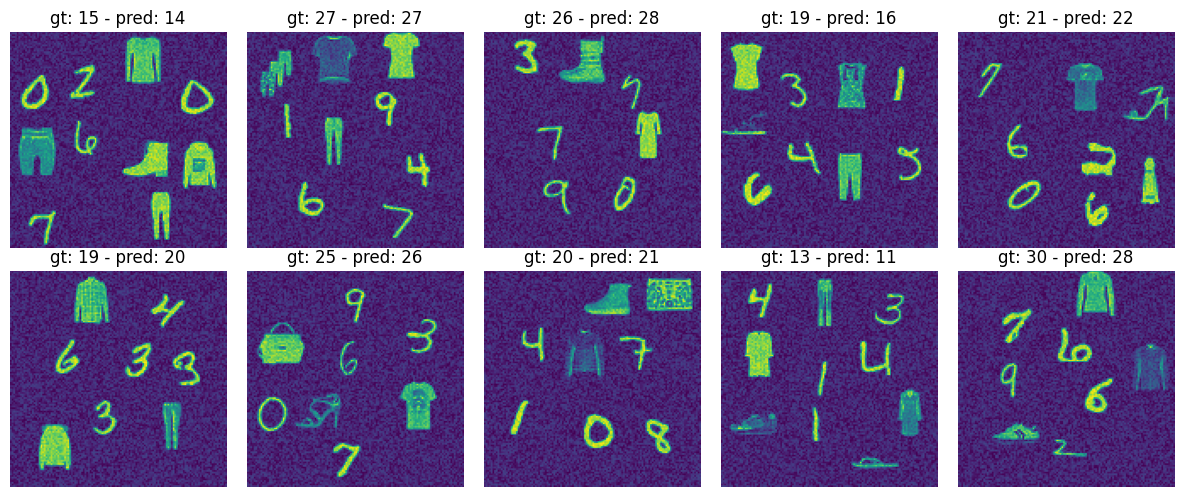

In [42]:
plot_images(images,sums,pred_sums)

In [66]:
def visualize_activations(model, x_sample):
    layer_outputs = [layer.output for layer in model.layers if 'conv2d' in layer.name]
    activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(x_sample[np.newaxis, ...])
    
    fig, axes = plt.subplots(len(activations), 8, figsize=(12, len(activations)*2))
    for i, activation in enumerate(activations):
        for j in range(min(8, activation.shape[-1])):
            ax = axes[i, j] if len(activations) > 1 else axes[j]
            ax.imshow(activation[0, :, :, j], cmap='viridis')
            #ax.set_title(f'Layer {i+1} Filter {j+1}')
            ax.axis('off')
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


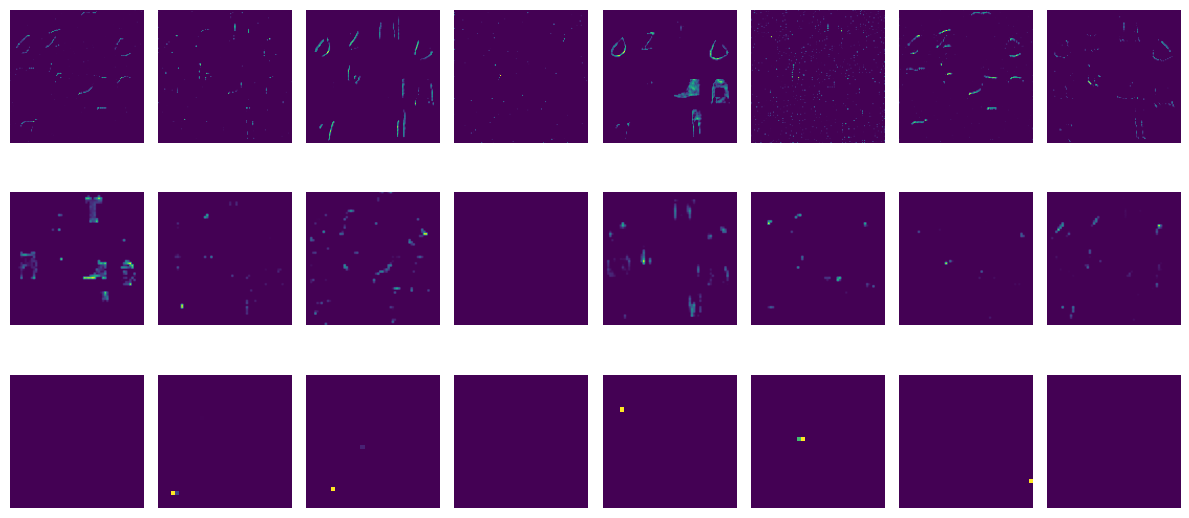

In [67]:
visualize_activations(baseline_model,images[0])